In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
df = pd.read_csv('~/Desktop/Heart-disease-classification/data/heart_failure_clinical_records_dataset.csv')

## Data Exploration & Visualization 

In [5]:
#checking the shape of the dataset 
df.shape

(299, 13)

In [6]:
#checking five rows of the data 
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
#checking columns type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
#checking for missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
#checking for duplicates 
df.duplicated().sum()

0

In [10]:
#checking summary statistics on continuous columns

#select continuous columns 
cont_columns = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
cat_columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

df_cont_columns = df[cont_columns]


df_cont_columns.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [11]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

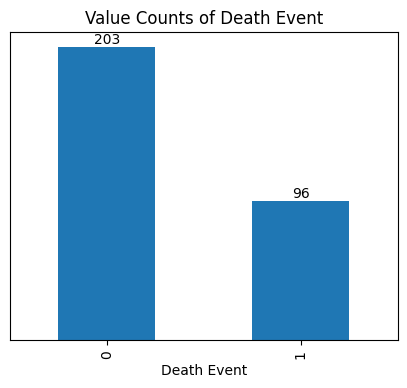

In [12]:
# Death events value counts 
# Calculate value counts of death event 
value_counts_death_event = df['DEATH_EVENT'].value_counts()

# Plot the bar chart
plt.figure(figsize=(5, 4))
ax = value_counts_death_event.plot(kind='bar')

# Annotate each bar with the count
for i, count in enumerate(value_counts_death_event):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

ax.yaxis.set_visible(False)  # Hide the y-axis


# Set labels and title
plt.xlabel('Death Event')
plt.ylabel('Counts')
plt.title('Value Counts of Death Event')

# Display the plot
plt.show()

In [13]:
def hist_plot(col):
    
    # Grouping ages based on death events
    alive_ages = df[df['DEATH_EVENT'] == 0][col]
    dead_ages = df[df['DEATH_EVENT'] == 1][col]
    
    # Plotting the histogram
    plt.hist([alive_ages, dead_ages], bins=10, color=['green', 'red'], edgecolor='black', label=['Alive', 'Dead'])
    
    # Adding labels and title
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col} with Death Event Legend')
    
    # Adding legend
    plt.legend()
    
    # Displaying the plot
    plt.show()


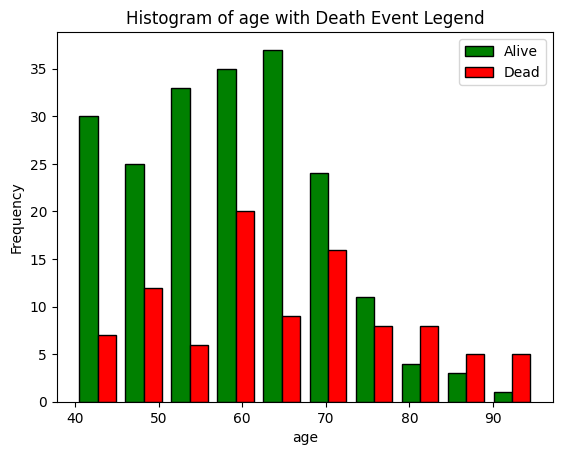

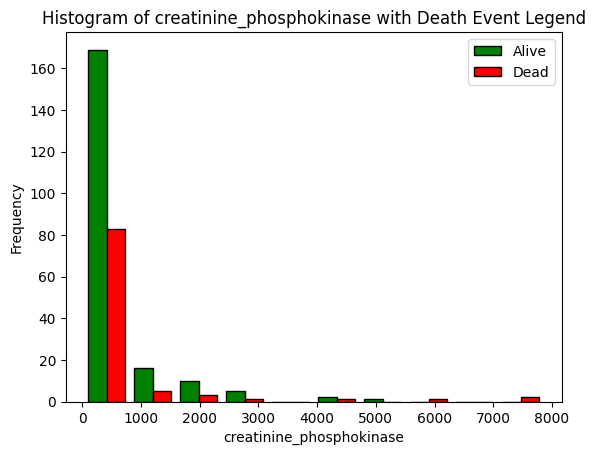

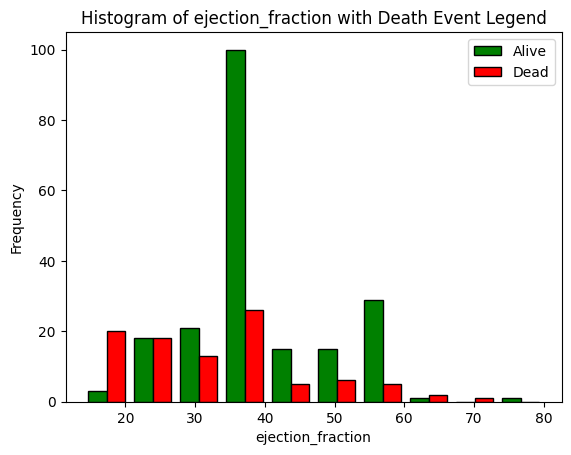

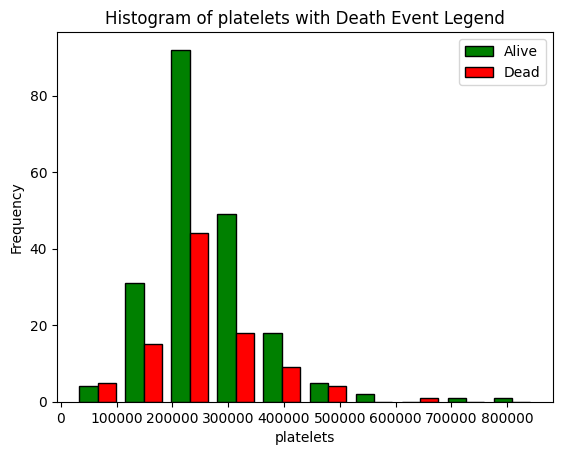

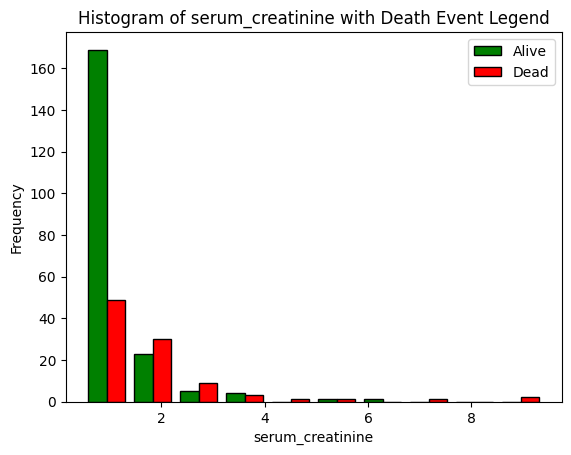

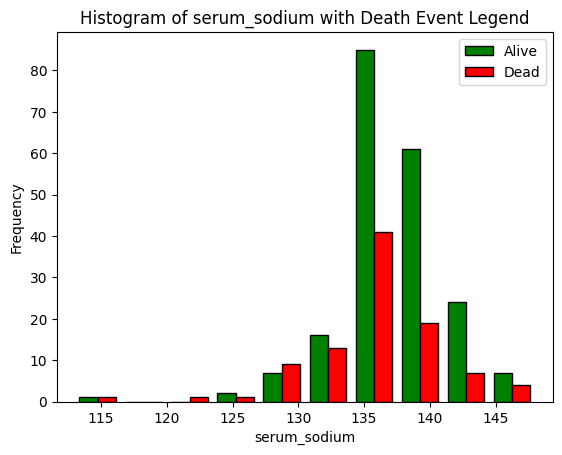

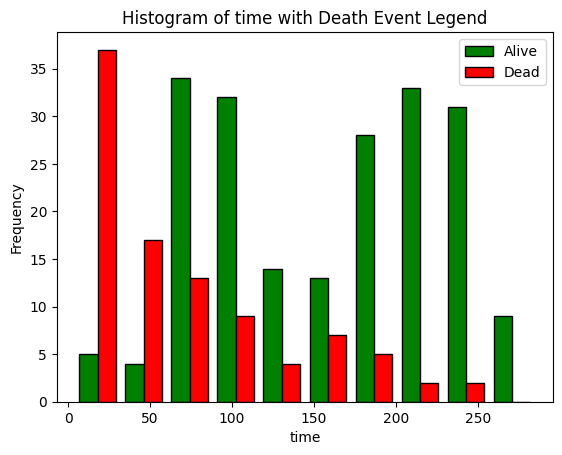

In [14]:
for i in df_cont_columns.columns:
    hist_plot(i)

In [15]:

def count_plot(col):
    # Plotting
    ax = sns.countplot(x=col, hue='DEATH_EVENT', data=df, palette={0: 'green', 1: 'red'})
    
    # Adding labels and title
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of {col} with Death Event')
    
    # Adding legend
    plt.legend(title='Death Event', labels=['Alive', 'Dead'])
    
    # Adding count values on bars
    for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    # Displaying the plot
    plt.show()

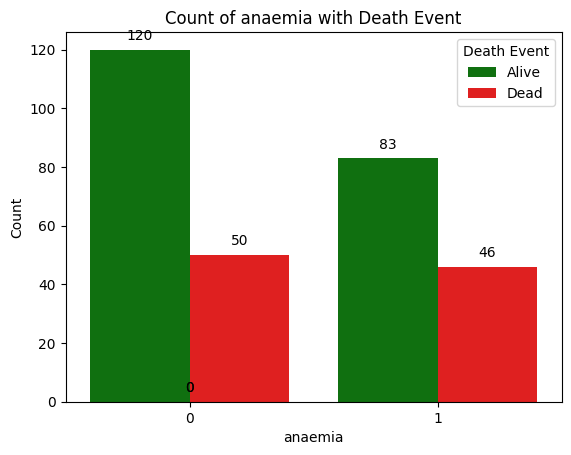

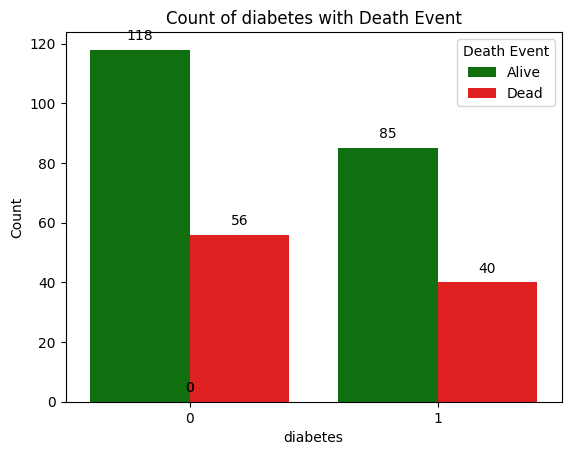

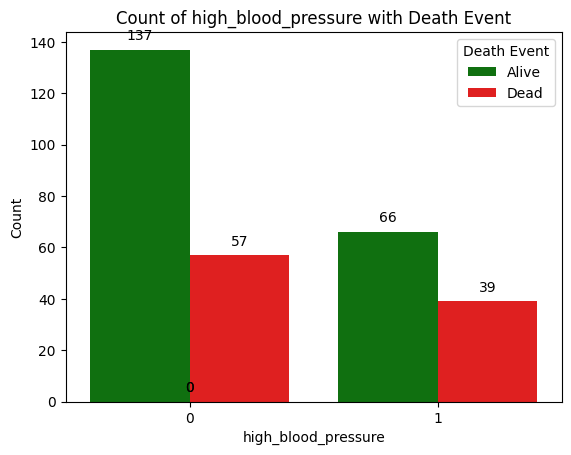

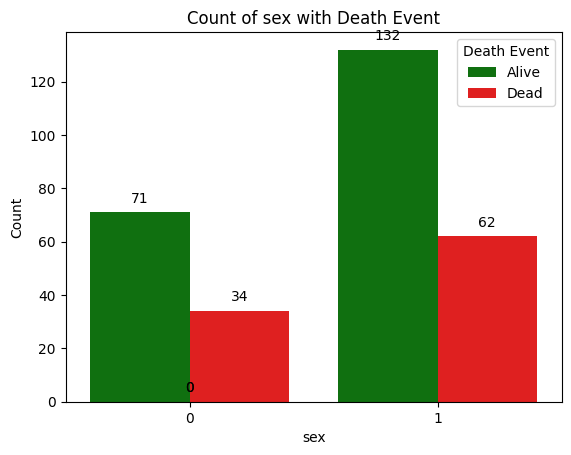

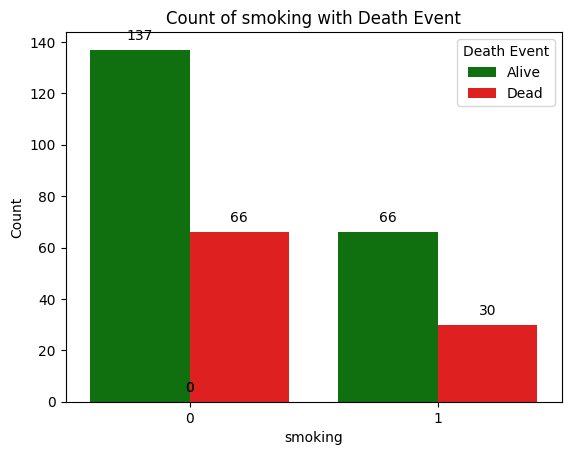

In [16]:
for i in cat_columns:
    count_plot(i)

In [17]:
def box_plot(col):

    # Plotting
    sns.boxplot(x='DEATH_EVENT', y=col, data=df)
    
    # Adding labels and title
    plt.xlabel('Death Event')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} with Death Event')

    
    # Displaying the plot
    plt.show()

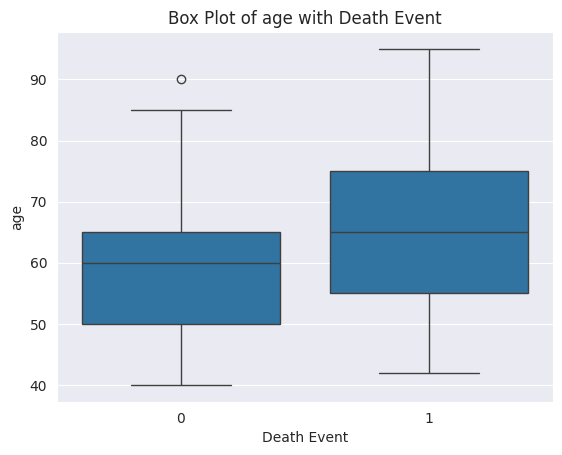

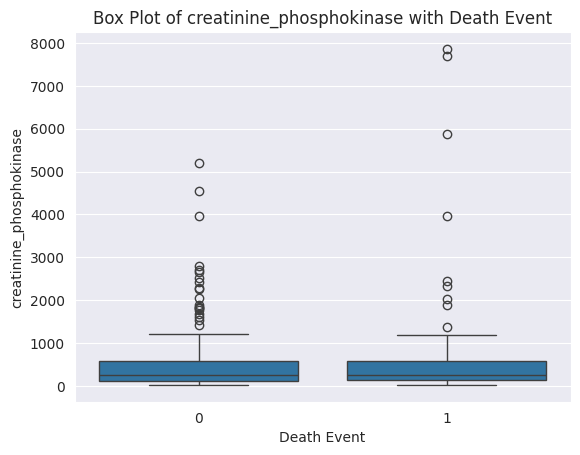

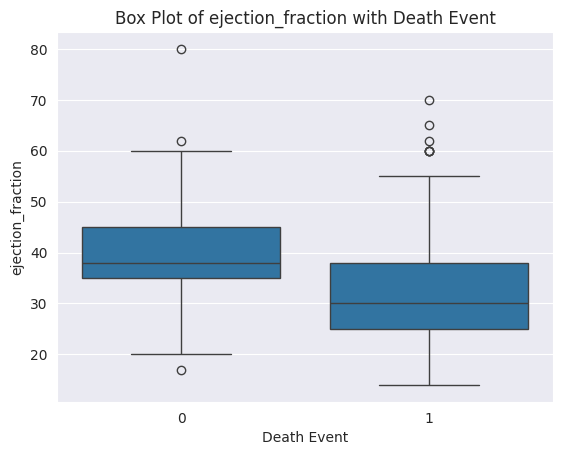

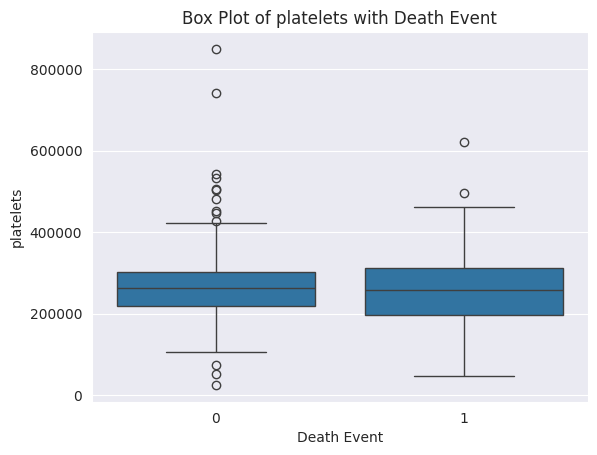

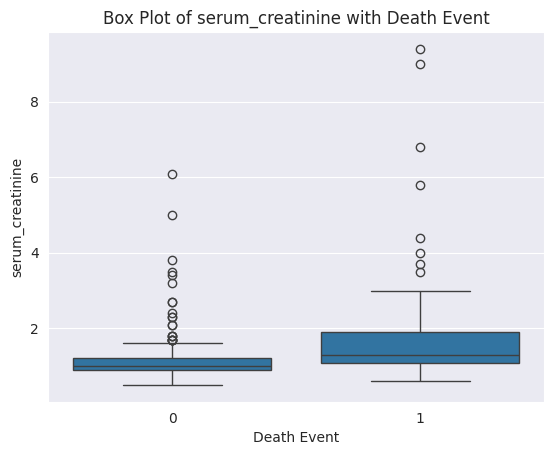

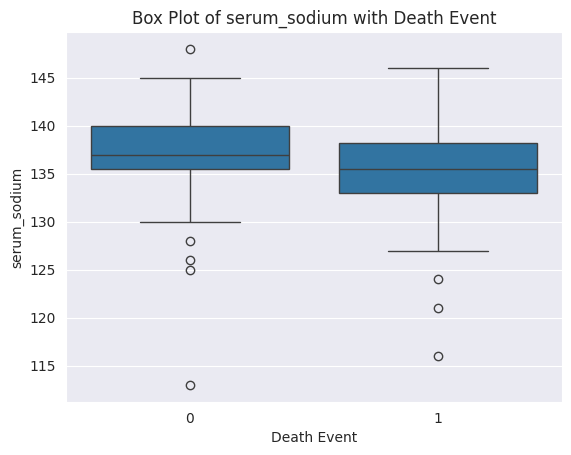

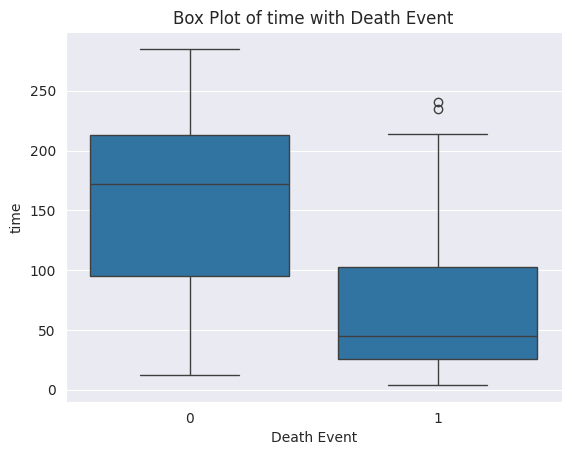

In [182]:
for i in cont_columns:
    box_plot(i)

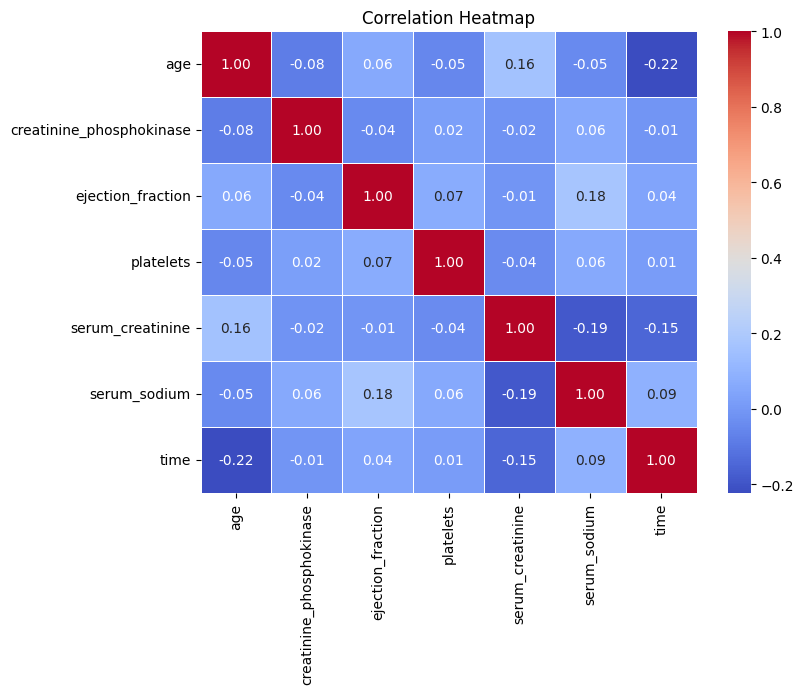

In [18]:
#heat map for correlation between continous variable
# Calculate the correlation matrix
correlation_matrix = df_cont_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



## outliers 

In [19]:
df.shape

(299, 13)

In [20]:
df_no_outliers = df.copy()

In [21]:
# Iterate over numerical columns
for column in df_cont_columns.columns:
    # Calculate quartiles and IQR
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

In [22]:
df_no_outliers.shape

(224, 13)

In [23]:
((df.shape[0] - df_no_outliers.shape[0])/df.shape[0]) * 100

25.08361204013378

25% of data are outliers 

# Insights 

1. No missing values and duplicates
2. We have 299 rows, where 203 rows are no death event and 96 are death event
3. continous columns are mostly not normally distributed
4. we have 25% of outliers
5. no correlation 

### data cleaning 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Data preprocessing 

In [25]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [26]:
df_preprocessor = df.copy()

In [27]:
df_preprocessor_no = df_no_outliers.copy()

In [28]:
df_preprocessor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [29]:
#convert all names of columns in the same form 
df_preprocessor.columns = [col.lower() for col in df_preprocessor.columns]
df_preprocessor_no.columns = [col.lower() for col in df_preprocessor_no.columns]


In [30]:
df_preprocessor

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [31]:
categorical_features = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

In [32]:
#converting from integer to categorical 
for i in categorical_features:
    df_preprocessor[i] = df_preprocessor[i].astype('category')

In [33]:
for i in categorical_features:
    df_preprocessor_no[i] = df_preprocessor_no[i].astype('category')

In [34]:
df_preprocessor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  death_event               299 non-null    int64   
dtypes: category(5), float64(3), int64(5)
memory usage:

In [35]:
#create dummies to categorical function
df_preprocessor = pd.get_dummies(df_preprocessor, columns=categorical_features)

In [36]:
df_preprocessor.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death_event,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,True,False,True,False,False,True,False,True,True,False
1,55.0,7861,38,263358.03,1.1,136,6,1,True,False,True,False,True,False,False,True,True,False
2,65.0,146,20,162000.00,1.3,129,7,1,True,False,True,False,True,False,False,True,False,True
3,50.0,111,20,210000.00,1.9,137,7,1,False,True,True,False,True,False,False,True,True,False
4,65.0,160,20,327000.00,2.7,116,8,1,False,True,False,True,True,False,True,False,True,False


In [37]:
df_preprocessor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   creatinine_phosphokinase  299 non-null    int64  
 2   ejection_fraction         299 non-null    int64  
 3   platelets                 299 non-null    float64
 4   serum_creatinine          299 non-null    float64
 5   serum_sodium              299 non-null    int64  
 6   time                      299 non-null    int64  
 7   death_event               299 non-null    int64  
 8   anaemia_0                 299 non-null    bool   
 9   anaemia_1                 299 non-null    bool   
 10  diabetes_0                299 non-null    bool   
 11  diabetes_1                299 non-null    bool   
 12  high_blood_pressure_0     299 non-null    bool   
 13  high_blood_pressure_1     299 non-null    bool   
 14  sex_0     

In [38]:
for i in df_preprocessor.select_dtypes(include=bool).columns.tolist():
    df_preprocessor[i] = df_preprocessor[i].astype('int32')

In [39]:
df_preprocessor.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death_event,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,1,0,1,0,0,1,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,1,0,1,0,1,0,0,1,1,0
2,65.0,146,20,162000.00,1.3,129,7,1,1,0,1,0,1,0,0,1,0,1
3,50.0,111,20,210000.00,1.9,137,7,1,0,1,1,0,1,0,0,1,1,0
4,65.0,160,20,327000.00,2.7,116,8,1,0,1,0,1,1,0,1,0,1,0


In [40]:
df_preprocessor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   creatinine_phosphokinase  299 non-null    int64  
 2   ejection_fraction         299 non-null    int64  
 3   platelets                 299 non-null    float64
 4   serum_creatinine          299 non-null    float64
 5   serum_sodium              299 non-null    int64  
 6   time                      299 non-null    int64  
 7   death_event               299 non-null    int64  
 8   anaemia_0                 299 non-null    int32  
 9   anaemia_1                 299 non-null    int32  
 10  diabetes_0                299 non-null    int32  
 11  diabetes_1                299 non-null    int32  
 12  high_blood_pressure_0     299 non-null    int32  
 13  high_blood_pressure_1     299 non-null    int32  
 14  sex_0     

In [41]:
df_preprocessor_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       224 non-null    float64 
 1   anaemia                   224 non-null    category
 2   creatinine_phosphokinase  224 non-null    int64   
 3   diabetes                  224 non-null    category
 4   ejection_fraction         224 non-null    int64   
 5   high_blood_pressure       224 non-null    category
 6   platelets                 224 non-null    float64 
 7   serum_creatinine          224 non-null    float64 
 8   serum_sodium              224 non-null    int64   
 9   sex                       224 non-null    category
 10  smoking                   224 non-null    category
 11  time                      224 non-null    int64   
 12  death_event               224 non-null    int64   
dtypes: category(5), float64(3), int64(5)
memory usage: 17.4

In [42]:
##split dependent and indepedent variables 
X_processed = df_preprocessor.drop('death_event',axis=1)
y_processed = df_preprocessor['death_event']

In [43]:
X_processed_no = df_preprocessor_no.drop('death_event',axis=1)
y_processed_no = df_preprocessor_no['death_event']

In [44]:
numeric_cols = X_processed.select_dtypes(include=['float64', 'int64']).columns

In [45]:
numeric_cols_no = X_processed_no.select_dtypes(include=['float64', 'int64']).columns

In [48]:
scaler = MinMaxScaler()

In [49]:
X_processed[numeric_cols] = scaler.fit_transform(X_processed[numeric_cols])

In [50]:
X_processed_no[numeric_cols] = scaler.fit_transform(X_processed_no[numeric_cols])

In [51]:
X_processed_no

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0,0.470990,0,0.117647,1,0.468852,0.866667,0.217391,1,0,0.000000
2,0.454545,0,0.098976,0,0.117647,0,0.131148,0.466667,0.173913,1,1,0.010676
3,0.181818,1,0.069113,0,0.117647,0,0.288525,0.866667,0.521739,1,0,0.010676
5,0.909091,1,0.014505,0,0.509804,1,0.268852,1.000000,0.304348,1,1,0.014235
6,0.636364,1,0.184300,0,0.019608,0,0.016393,0.400000,0.521739,1,0,0.021352
...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.363636,0,0.247440,0,0.411765,0,0.036066,0.533333,0.608696,1,0,0.903915
292,0.218182,0,0.136519,1,0.470588,0,0.852459,0.266667,0.652174,1,1,0.903915
293,0.418182,1,0.062287,1,0.411765,0,0.186885,0.200000,0.478261,1,1,0.946619
294,0.400000,0,0.026451,1,0.470588,1,0.108197,0.333333,0.782609,1,1,0.946619


In [54]:
#apply random over sampling to handle imbalancement
ros = RandomOverSampler(random_state=42)
X_processed_resampled, y_processor_resampled = ros.fit_resample(X_processed, y_processed)
X_processed_resampled_no, y_processor_resampled_no = ros.fit_resample(X_processed_no, y_processed_no)


<Axes: xlabel='death_event'>

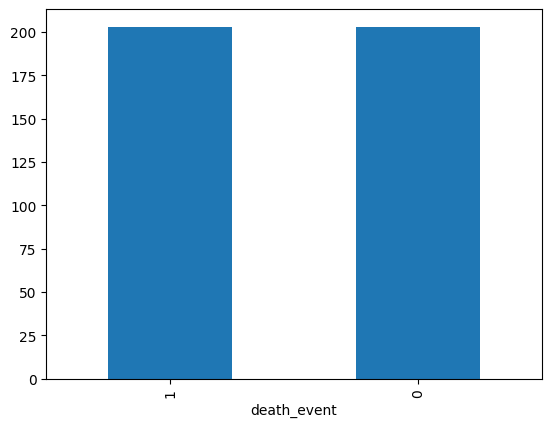

In [55]:
y_processor_resampled.value_counts().plot(kind='bar')

In [56]:
X_processed_resampled

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,1,0,1,0,0,1,0,1,1,0
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,1,0,1,0,1,0,0,1,1,0
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,1,0,1,0,1,0,0,1,0,1
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,0,1,1,0,1,0,0,1,1,0
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.818182,0.000000,0.469697,0.405989,0.280899,0.542857,0.085409,1,0,1,0,1,0,0,1,1,0
402,0.763636,0.045420,0.545455,0.026549,0.089888,0.657143,0.032028,0,1,1,0,1,0,0,1,1,0
403,0.509091,0.070681,0.166667,0.170809,0.056180,0.714286,0.138790,0,1,1,0,0,1,0,1,1,0
404,0.345455,0.032789,0.166667,0.335677,0.056180,0.800000,0.263345,0,1,0,1,0,1,1,0,1,0


In [57]:
for i in X_processed_resampled_no.select_dtypes(include="category").columns.tolist():
    X_processed_resampled_no[i] = X_processed_resampled_no[i].astype('int')

In [58]:
X_processed_resampled_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       326 non-null    float64
 1   anaemia                   326 non-null    int64  
 2   creatinine_phosphokinase  326 non-null    float64
 3   diabetes                  326 non-null    int64  
 4   ejection_fraction         326 non-null    float64
 5   high_blood_pressure       326 non-null    int64  
 6   platelets                 326 non-null    float64
 7   serum_creatinine          326 non-null    float64
 8   serum_sodium              326 non-null    float64
 9   sex                       326 non-null    int64  
 10  smoking                   326 non-null    int64  
 11  time                      326 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 30.7 KB


## Model training 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_processed_resampled, y_processor_resampled, test_size=0.2, random_state=42)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_processed_resampled_no, y_processor_resampled_no, test_size=0.2, random_state=42)


In [61]:
# Initialize models with default parameters
def model_training(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVC': SVC(random_state=42),
        'XGBoost': XGBClassifier(random_state=42)
    }
    
    # Store results
    results = []
    
    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"Training and evaluating {model_name}...")
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predictions on training set
        train_preds = model.predict(X_train)
        
        # Predictions on testing set
        test_preds = model.predict(X_test)
        
        # Classification report on training set
        print(f"\nTraining Set Classification Report for {model_name}:")
        print(classification_report(y_train, train_preds))
        
        # Classification report on testing set
        print(f"\nTesting Set Classification Report for {model_name}:")
        print(classification_report(y_test, test_preds))
        
        # Accuracy on training set
        train_accuracy = accuracy_score(y_train, train_preds)
        print(f"\nTraining Set Accuracy for {model_name}: {train_accuracy:.2f}")
        
        # Accuracy on testing set
        test_accuracy = accuracy_score(y_test, test_preds)
        print(f"Testing Set Accuracy for {model_name}: {test_accuracy:.2f}")
        
        # Store results
        results.append({
            'model': model_name,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy
        })
        
        print("-------------------------------------------")
    
        # Plot feature importances for models that support it
        if model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            
            plt.figure(figsize=(12, 6))
            plt.title(f'Feature Importances for {model_name}')
            plt.bar(range(X_train.shape[1]), importances[indices], align='center')
            plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
            plt.xlim([-1, X_train.shape[1]])
            plt.show()

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Plot the accuracies
    plt.figure(figsize=(12, 6))
    plt.plot(results_df['model'], results_df['train_accuracy'], marker='o', label='Training Accuracy')
    plt.plot(results_df['model'], results_df['test_accuracy'], marker='s', label='Testing Accuracy')
    plt.title('Model Accuracies')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


Training and evaluating Logistic Regression...

Training Set Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       162
           1       0.79      0.80      0.79       162

    accuracy                           0.79       324
   macro avg       0.79      0.79      0.79       324
weighted avg       0.79      0.79      0.79       324


Testing Set Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.80      0.78      0.79        41

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.79      0.79      0.79        82


Training Set Accuracy for Logistic Regression: 0.79
Testing Set Accuracy for Logistic Regression: 0.79
-------------------------------------------
Training and evaluating Decisi

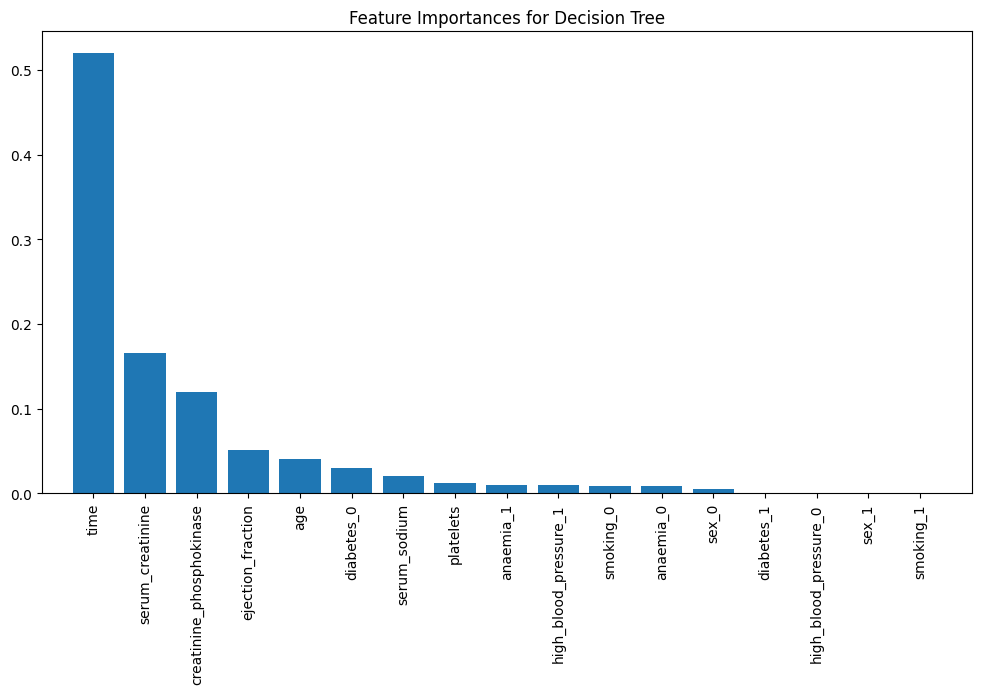

Training and evaluating Random Forest...

Training Set Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       162

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324


Testing Set Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        41
           1       0.85      0.98      0.91        41

    accuracy                           0.90        82
   macro avg       0.91      0.90      0.90        82
weighted avg       0.91      0.90      0.90        82


Training Set Accuracy for Random Forest: 1.00
Testing Set Accuracy for Random Forest: 0.90
-------------------------------------------


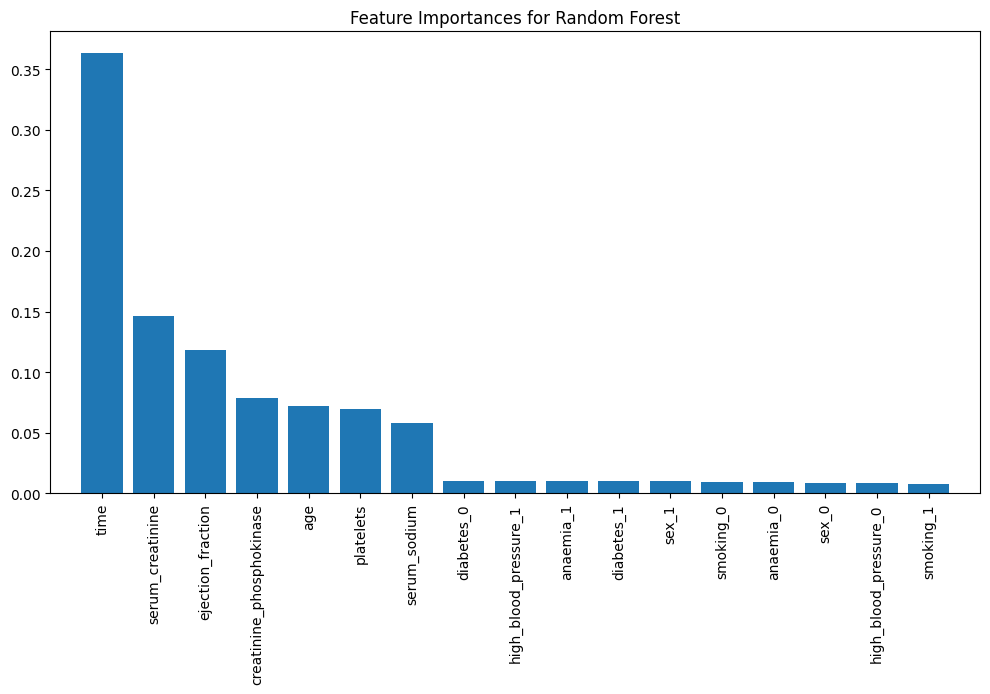

Training and evaluating SVC...

Training Set Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       162
           1       0.82      0.86      0.84       162

    accuracy                           0.84       324
   macro avg       0.84      0.84      0.84       324
weighted avg       0.84      0.84      0.84       324


Testing Set Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.74      0.85      0.80        41

    accuracy                           0.78        82
   macro avg       0.79      0.78      0.78        82
weighted avg       0.79      0.78      0.78        82


Training Set Accuracy for SVC: 0.84
Testing Set Accuracy for SVC: 0.78
-------------------------------------------
Training and evaluating XGBoost...

Training Set Classification Report for XGBoost:
              precision   

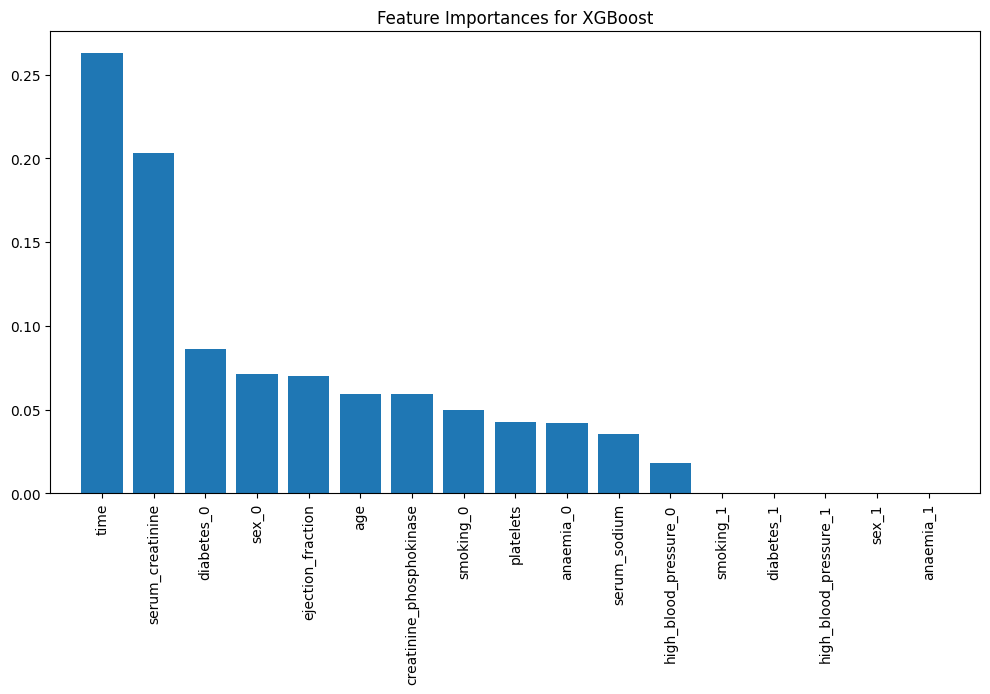

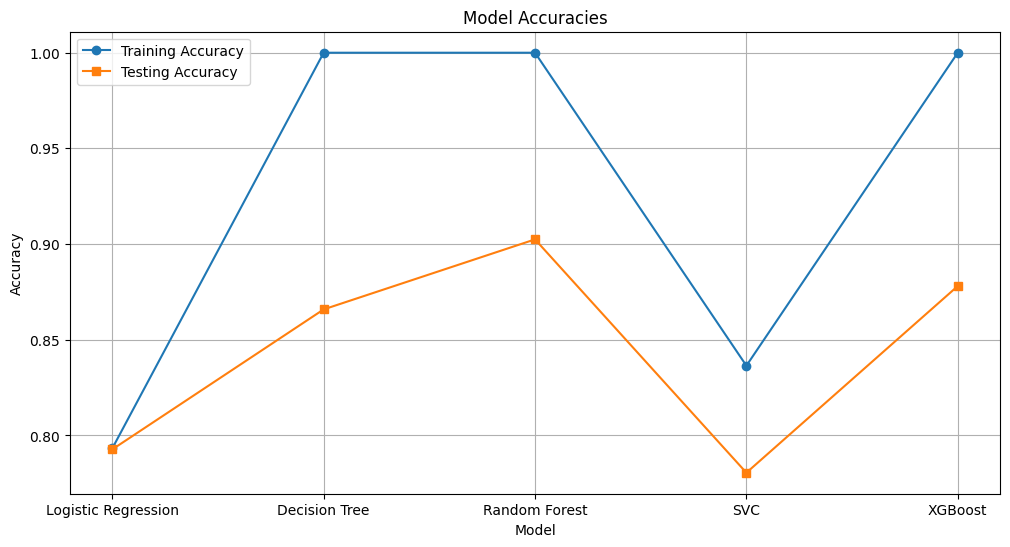

In [62]:
model_training(X_train, X_test, y_train, y_test)

Training and evaluating Logistic Regression...

Training Set Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       128
           1       0.83      0.87      0.85       132

    accuracy                           0.84       260
   macro avg       0.84      0.84      0.84       260
weighted avg       0.84      0.84      0.84       260


Testing Set Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        35
           1       0.71      0.65      0.68        31

    accuracy                           0.71        66
   macro avg       0.71      0.71      0.71        66
weighted avg       0.71      0.71      0.71        66


Training Set Accuracy for Logistic Regression: 0.84
Testing Set Accuracy for Logistic Regression: 0.71
-------------------------------------------
Training and evaluating Decisi

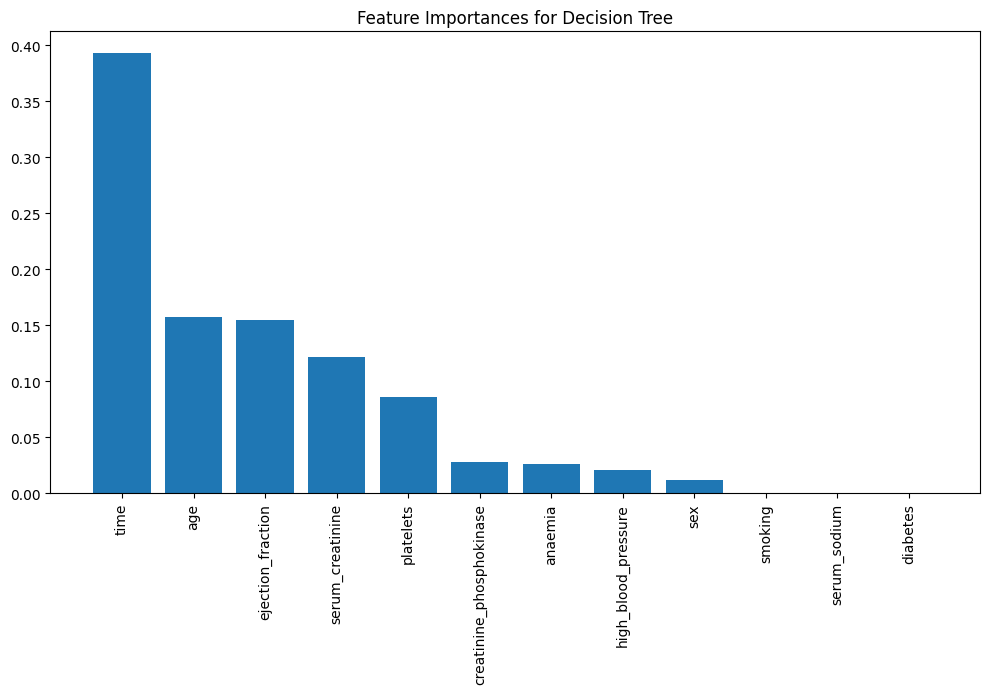

Training and evaluating Random Forest...

Training Set Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       132

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260


Testing Set Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.77      0.77      0.77        31

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66


Training Set Accuracy for Random Forest: 1.00
Testing Set Accuracy for Random Forest: 0.79
-------------------------------------------


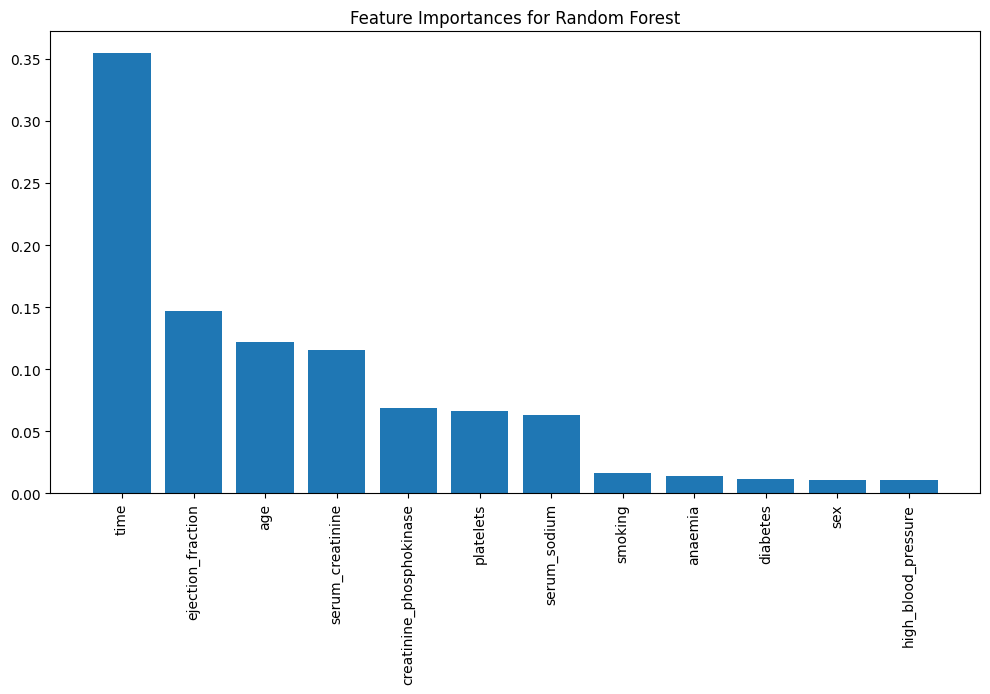

Training and evaluating SVC...

Training Set Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       128
           1       0.90      0.98      0.93       132

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260


Testing Set Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        35
           1       0.71      0.71      0.71        31

    accuracy                           0.73        66
   macro avg       0.73      0.73      0.73        66
weighted avg       0.73      0.73      0.73        66


Training Set Accuracy for SVC: 0.93
Testing Set Accuracy for SVC: 0.73
-------------------------------------------
Training and evaluating XGBoost...

Training Set Classification Report for XGBoost:
              precision   

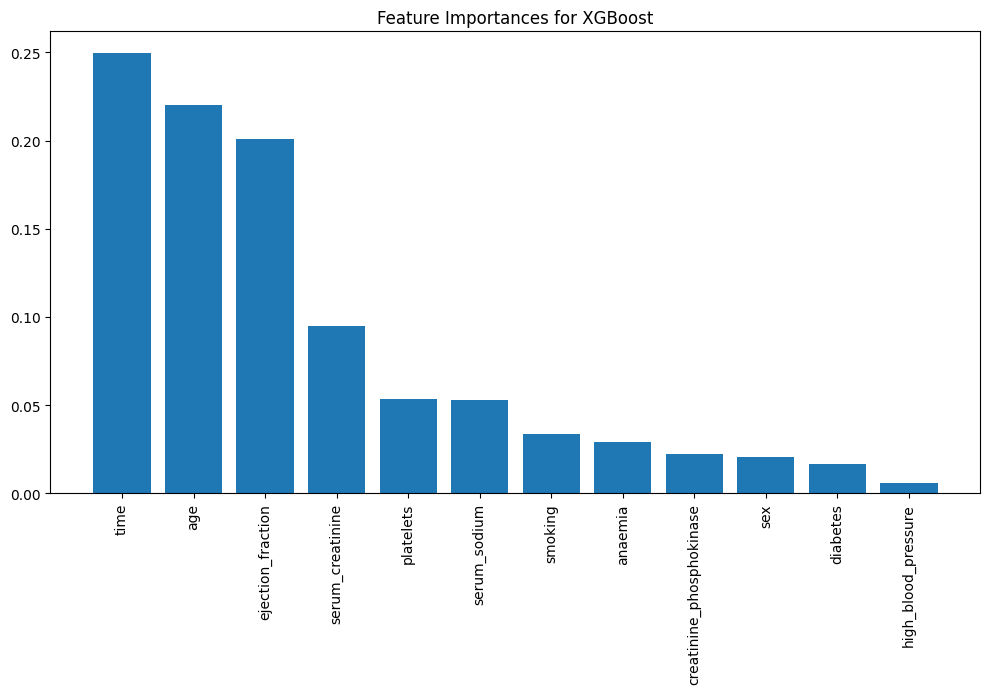

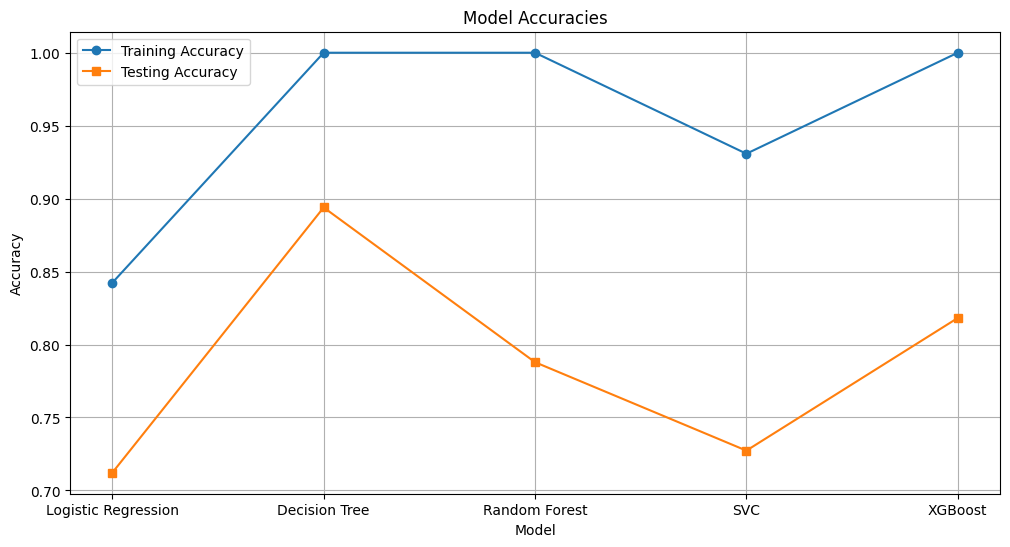

In [63]:
model_training(X_train_no, X_test_no, y_train_no, y_test_no)

Training and evaluating Random Forest...
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Training Set Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       128
           1       0.99      1.00      1.00       132

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260


Testing Set Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        35
           1       0.86      0.77      0.81        31

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66


Training Set Accuracy for Ran

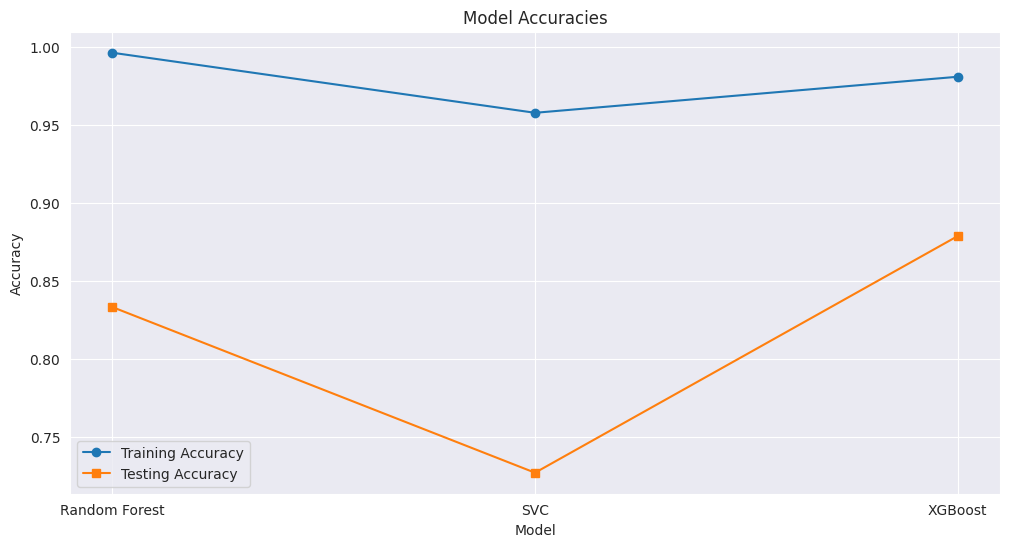

In [243]:
# Define comprehensive hyperparameters grid for each model
param_grid = {
    'Random Forest': {
        'n_estimators': [10, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVC': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4],
        'coef0': [0.0, 0.1, 0.5]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, 15],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}

# Initialize models with GridSearchCV
models = {
    'Random Forest': GridSearchCV(RandomForestClassifier(random_state=42), param_grid['Random Forest'], cv=5),
    'SVC': GridSearchCV(SVC(random_state=42), param_grid['SVC'], cv=5),
    'XGBoost': GridSearchCV(XGBClassifier(random_state=42), param_grid['XGBoost'], cv=5)
}

# Store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Best parameters found by GridSearchCV
    print(f"Best parameters for {model_name}: {model.best_params_}")
    
    # Predictions on training set
    train_preds = model.predict(X_train)
    
    # Predictions on testing set
    test_preds = model.predict(X_test)
    
    # Classification report on training set
    print(f"\nTraining Set Classification Report for {model_name}:")
    print(classification_report(y_train, train_preds))
    
    # Classification report on testing set
    print(f"\nTesting Set Classification Report for {model_name}:")
    print(classification_report(y_test, test_preds))
    
    # Accuracy on training set
    train_accuracy = accuracy_score(y_train, train_preds)
    print(f"\nTraining Set Accuracy for {model_name}: {train_accuracy:.2f}")
    
    # Accuracy on testing set
    test_accuracy = accuracy_score(y_test, test_preds)
    print(f"Testing Set Accuracy for {model_name}: {test_accuracy:.2f}")
    
    # Store results
    results.append({
        'model': model_name,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })
    print("-------------------------------------------")


# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot the accuracies
plt.figure(figsize=(12, 6))
plt.plot(results_df['model'], results_df['train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(results_df['model'], results_df['test_accuracy'], marker='s', label='Testing Accuracy')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [65]:
### selected the models 
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'eta': [0.01, 0.1, 0.3]
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train_no, y_train_no)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 1.0, 'eta': 0.3, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.8}
Best cross-validation score:  0.9423076923076923


In [126]:
# Define XGBoost classifier with specified parameters
model_XGB = XGBClassifier(
    colsample_bytree=1,
    gamma=0.5,
    learning_rate=0.2,
    eta=0.3,
    max_depth=10,
    subsample=0.8,
    n_estimators=50,
    objective='binary:logistic',
    eval_metric='logloss',
    reg_lambda=0.1,
    alpha=0.1
)

# Train the model
model_XGB.fit(X_train_no, y_train_no)

# Predictions
y_train_pred = model_XGB.predict(X_train_no)
y_test_pred = model_XGB.predict(X_test_no)

# Evaluate the model
train_accuracy = accuracy_score(y_train_no, y_train_pred)
test_accuracy = accuracy_score(y_test_no, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

print("Classification Report for Training Data:")
print(classification_report(y_train_no, y_train_pred))

print("Classification Report for Testing Data:")
print(classification_report(y_test_no, y_test_pred))

Training Accuracy: 0.9923076923076923
Testing Accuracy: 0.8939393939393939
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.99      1.00      0.99       132

    accuracy                           0.99       260
   macro avg       0.99      0.99      0.99       260
weighted avg       0.99      0.99      0.99       260

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.88      0.90      0.89        31

    accuracy                           0.89        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.89      0.89      0.89        66



In [128]:
# Train the model
model_XGB.fit(X_train, y_train)

# Predictions
y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.9907407407407407
Testing Accuracy: 0.9024390243902439
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       162
           1       0.99      0.99      0.99       162

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        41
           1       0.85      0.98      0.91        41

    accuracy                           0.90        82
   macro avg       0.91      0.90      0.90        82
weighted avg       0.91      0.90      0.90        82

